## **OBJETIVOS DO PROJETO**

Desenvolver um algoritmo de Detecção de notas Forjadas e Autênticas utilizando modelos de Machine Learning 

Este exercício foi resolvido com base nos ensinamentos obtidos no OUTSPOKEN MARKET do professor Leandro Guerra

## **DESCRIÇÃO**

Os dados foram extraídos de imagens que foram tiradas de espécimes semelhantes a notas de banco genuínas class = 1 e forjadas . class = 0Para a digitalização, foi utilizada uma câmera industrial usualmente utilizada para inspeção de impressão. As imagens finais continham 400 x 400 pixels. Devido à lente do objeto e à distância do objeto investigado, foram obtidas imagens em escala de cinza com resolução de cerca de 660 dpi. Ferramentas de transformação wavelet foram usadas para extrair características das imagens.

**FORMATO**

Um data frame com 1372 linhas e 5 variáveis.


**DETELHES**


- **vow**

Variação da imagem transformada wavelet (contínua)

- **sow**

Distorção da imagem transformada wavelet (contínua)

- **kow**

Curtose da imagem transformada wavelet (contínua)

- **eoi**

Entropia da imagem (contínua)

- **class**

Inteiro especificando se o espécime era ou não genuíno ( class = 1) ou forjado ( class = 0).

**FONTE DOS DADOS**

Dua, D. e Graff, C. (2019). Repositório de aprendizado de máquina UCI [http://archive.ics.uci.edu/ml]. Irvine, CA: Universidade da Califórnia, Escola de Informação e Ciência da Computação.





## **ANÁLISE EXPLORATÓRIA DOS DADOS**

Primeiramente vou iniciar verificando de forma detalhada todos os dados que compõem a base. 

O Objetivo desta fase da é identificar possíveis problemas com a base com por exemplo dados faltantes, tipos de dados ou até mesmo dados muito fora do contexto. 


In [1]:
# Importando as bibliotecas que serão utilizadas na fase de análise explorátória do projeto

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# importando a base de Dados e verificando dados de forma generalizada
df = pd.read_csv('bill_authentication.csv')
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3866.00000,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.tail()

,Variance,Skewness,Curtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12393.0000,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [4]:
# Verificando o tamanho da base
df.shape

(1372, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,51.987815,151.320910,154.985140,-57.872528,0.444606
std,878.732471,1879.770793,1380.112747,524.659941,0.497103
min,-6651.000000,-12813.000000,-5149.000000,-6959.000000,0.000000
25%,-1.834425,-1.769775,-1.664300,-2.591875,0.000000
50%,0.496180,2.419000,0.616630,-0.588590,0.000000
75%,3.072000,7.207825,3.716225,0.398045,1.000000
max,5807.000000,12606.000000,12555.000000,1909.000000,1.000000


In [7]:
df['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

/home/evaldoj/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


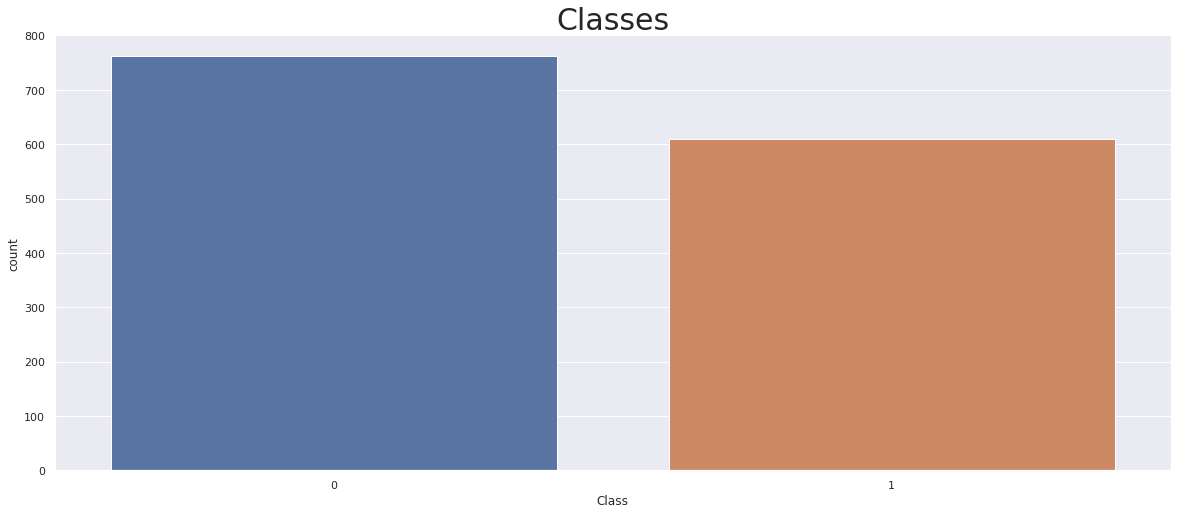

In [8]:
fig, ax = plt.subplots(figsize = (20,8))

sns.countplot(df['Class'])

ax.set_title('Classes', fontdict = {'fontsize':30})

plt.show();

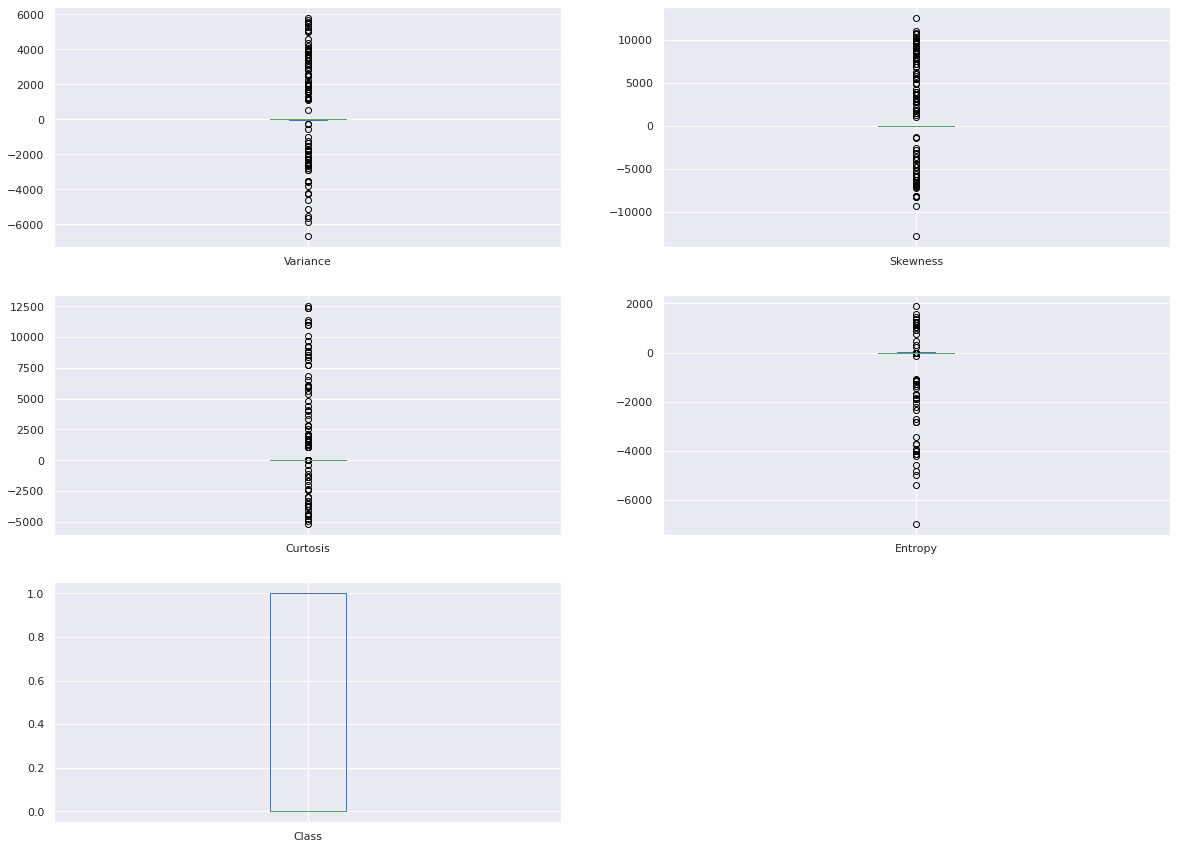

In [9]:
df.plot(kind = 'box', subplots = True, layout = (3,2), sharex = False, sharey = False, figsize = (20,15));

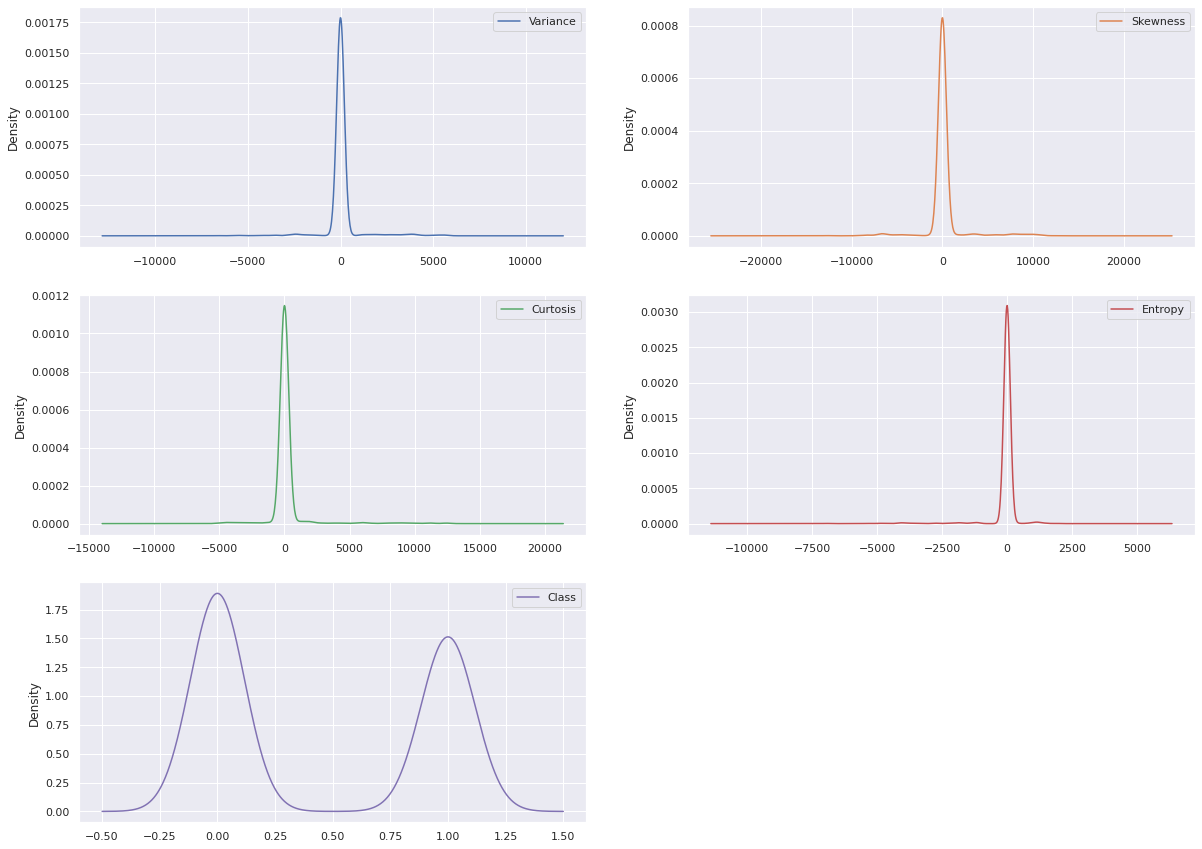

In [10]:
df.plot(kind = 'density', subplots = True, layout = (3,2), sharex = False, sharey = False, figsize = (20,15));

### **IMPRESSÃO SOBRE OS DADOS**

Confesso que realmente não encontrei documentação mais detalhada sobre os dados e por isso não tenho condições de avaliar se o que está sendo exibido nos BoxPlots faz ou não sentido.

Olhando o gráfico de Densidade dos dados, aparentemente se tem distribuições bastante regulares, salvo o do atributo Entropy, que possui uma quantidade de dados que vai até -1000. 

Para este estudo, em um primeiro momento eu farei a aplicação do modelo com a base como está e na sequência, vou fazer um ponto de corte em -5000 no atributo entropia para ver se a performance do modelo é aumentada. 



## **DIVISÃO DOS DADOS EM TREINO E TESTE**

Agora vou fazer a divisão dos dados em treino e teste. Como padrão vou deixar 70% dos dados para treino e 30 para teste. 

Adoto estes percentuais por serem o padrão geral que encontro em literaturas. 

Antes vou definir qual dos atributos será minha variável alvo e quais outros atributos serão minhas variáveis preditoras. 

Faço isso utilizando o drop do pandas para excluir o atributo Class e depois pego apenas o atributo Class para ser utilizado com variável alvo.

Para fazer a divisão vou utilizar o train_test_plit do Sklearn. Este método é bastante poderoso e muito útil, uma vez que se encarrega de fazer o shuffle dos dados e tambem a divisão de forma muito simples. 



In [11]:
df.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [16]:
# Separando os dados entre Alvo e Preditores

x = df.drop('Class', axis = 1)
y = df['Class']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= .30, random_state= 54)

# Aqui verifico o tamnho dos dados
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((960, 4), (960,), (412, 4), (412,))

### **ARVORES DE DECISÃO**

Para este estudo será aplicada uma árvore de decisão que nada mais é do que um algoritmo supervisionado que pode ser aplicado para prever tanto variáveis discretas quanto para valores numéricos. 

De forma bastante simplória, ela trabalha segundo um “fluxograma” que vai se relacionando através de “se-então” até chegar na variável alvo. 

Este algoritmo trabalha de forma recursiva, ou seja, segue sempre o mesmo padrão, mesmo quando encontra variáveis diferentes. 

Este algoritmo se encaixa muito bem em problemas onde existem diversos rótulos,ou com categorias múltiplas, sem contar que é possível lidar com dados sem se preocupar muito com o tratamento.

A desvantagem é que pode facilmente ser “overfitado”. Por isso merece certa cautela quando está sendo empregado. 


Acurácia do Modelo 96.84%


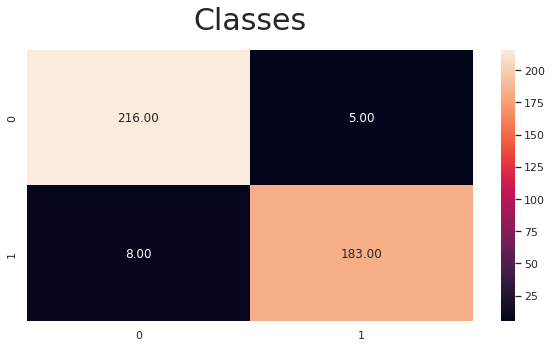

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       221
           1       0.97      0.96      0.97       191

    accuracy                           0.97       412
   macro avg       0.97      0.97      0.97       412
weighted avg       0.97      0.97      0.97       412



In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

arvore = DecisionTreeClassifier()

arvore.fit(x_train, y_train)

predict = arvore.predict(x_test)

acuracia = accuracy_score(y_test, predict) * 100


#============= RESULTADOS =================================================

print(f'Acurácia do Modelo {round(acuracia,2)}%')

fig, ax = plt.subplots(figsize = (10,5))

sns.heatmap(confusion_matrix(y_test, predict), annot = True, fmt = '.2f', ax = ax)
ax.set_title('Classes', fontdict = {'fontsize':30}, pad = 20)

plt.show();


print(classification_report(y_test, predict))



## **VALIDAÇÃO CRUZADA**

In [28]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Definindo os KFolds
kfold = KFold(n_splits= 30, shuffle= True, random_state= 5)

resultado = cross_val_score(arvore, x, y, cv = kfold)

resultado = resultado.mean() * 100

print(f'Resultado da validação cruzada {round(resultado)}%')

Resultado da validação cruzada 98%


## **CONCLUSÃO**

Em um primeiro momento achei que o modelo não teria uma performance tão boa por conta de não conhecer muito bem a base de dados.

Achei que poderia ter penalização porque os dados da variável Entropy não me pareceram muito bem distribuídos. 

No entanto, os resultados foram muito bons, tanto nos dados de treino quanto nos dados de treino, além de apresentarem uma performance muito estável com a validação cruzada. 

